<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Drive 연결

In [ ]:
from google.colab import drive
# google drive를 google colab에 연결. 처음 실행 시, 인증 필요
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Google Drive 파일 읽기 테스트

In [ ]:
import pandas as pd

# 파일이 저장되어있는 경로
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/CNN/"

### **CIFAR-10 Dataset**
https://www.cs.toronto.edu/~kriz/cifar.html

32*32 Scale images

{airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck}


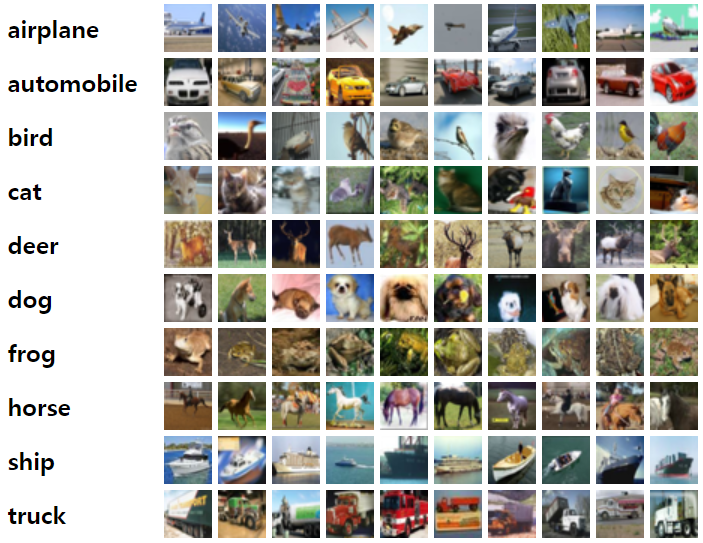

**CIFAR-10 데이터 불러오기**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import time

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
print("before:",y_train[0:3])
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print("after:",y_train[0:3])

170498071/170498071 [==============================] - 4s 0us/step
before: [[6]
 [9]
 [9]]
after: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
print(x_train.shape)
print("before:",x_train[0])

(50000, 32, 32, 3)
before: [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.67843

In [ ]:
x_test.shape

(10000, 32, 32, 3)

CNN 모델 설계 및 가시화

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

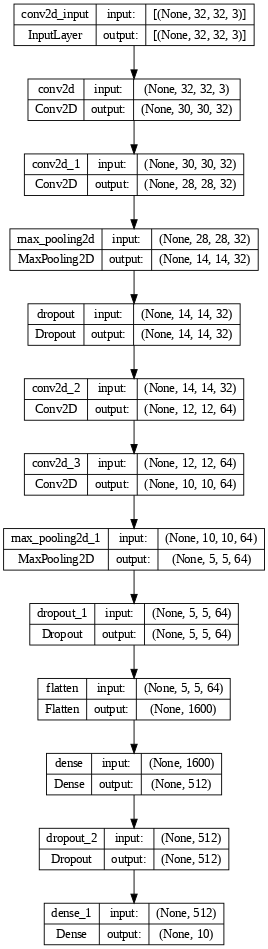

In [ ]:
# 모델 구조 설계
input_shape=(32,32,3)
n_kernals1=32
n_kernals2=64
n_hidden1=512
n_output=10

kernel_size=(3,3)
pool_size=(2,2)
strides=(1,1)

# Model hyperparameters
activation='relu'
kernel_initializer='glorot_uniform'
bias_initializer='zeros'
dropout_rate=[0.25,0.25,0.25]
l2_reg=0.0

# 모델 설계
cnn=Sequential()
cnn.add(Conv2D(n_kernals1, kernel_size, strides=strides, activation=activation,
               kernel_initializer=kernel_initializer, bias_initializer=bias_initializer, input_shape=input_shape))
cnn.add(Conv2D(n_kernals1, kernel_size, strides=strides, activation=activation,
               kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
cnn.add(MaxPooling2D(pool_size=pool_size))
cnn.add(Dropout(dropout_rate[0]))
cnn.add(Conv2D(n_kernals2, kernel_size, strides=strides, activation=activation,
               kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
cnn.add(Conv2D(n_kernals2, kernel_size, strides=strides, activation=activation,
               kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
cnn.add(MaxPooling2D(pool_size=pool_size))
cnn.add(Dropout(dropout_rate[1]))
cnn.add(Flatten())
cnn.add(Dense(n_hidden1, activation=activation))
cnn.add(Dropout(dropout_rate[2]))
cnn.add(Dense(n_output, activation='softmax',
              kernel_regularizer=regularizers.l2(l2_reg)))

# 모델 확인
cnn.summary()

# SVG로 그리기
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
%matplotlib inline
SVG(model_to_dot(cnn, show_shapes=True, dpi=65).create(prog='dot', format='svg'))  # SVG로 가시화
plot_model(cnn, to_file=dir+'cnn_cifar10.png', show_shapes=True, show_layer_names=True, dpi=65) # 파일 출력

모델 학습, 평가, 저장

In [ ]:
# Learning hyperparameters
batch_size=128
epochs=300
optimizer=Adam()

# 모델 학습
start=time.time()
cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
hist=cnn.fit(x_train, y_train,
             batch_size=batch_size, epochs=epochs,
             validation_data=(x_test,y_test), verbose=2)
end=time.time()
print("학습시간(초):", end-start)

# 정확도 평가(1)
res=cnn.evaluate(x_test, y_test, verbose=0)
print("정확도(%):", res[1]*100)

# 모델 저장
cnn.save(dir + "cnn_cifar10.h5")
print("Saved model to disk.")

Epoch 1/300
391/391 - 16s - loss: 1.6121 - accuracy: 0.4054 - val_loss: 1.3125 - val_accuracy: 0.5216 - 16s/epoch - 42ms/step
Epoch 2/300
391/391 - 4s - loss: 1.2474 - accuracy: 0.5538 - val_loss: 1.0770 - val_accuracy: 0.6230 - 4s/epoch - 10ms/step
Epoch 3/300
391/391 - 4s - loss: 1.0558 - accuracy: 0.6283 - val_loss: 0.9546 - val_accuracy: 0.6597 - 4s/epoch - 10ms/step
Epoch 4/300
391/391 - 4s - loss: 0.9364 - accuracy: 0.6690 - val_loss: 0.9002 - val_accuracy: 0.6816 - 4s/epoch - 11ms/step
Epoch 5/300
391/391 - 4s - loss: 0.8381 - accuracy: 0.7060 - val_loss: 0.8526 - val_accuracy: 0.7006 - 4s/epoch - 10ms/step
Epoch 6/300
391/391 - 4s - loss: 0.7758 - accuracy: 0.7288 - val_loss: 0.8115 - val_accuracy: 0.7146 - 4s/epoch - 10ms/step
Epoch 7/300
391/391 - 4s - loss: 0.7168 - accuracy: 0.7476 - val_loss: 0.7105 - val_accuracy: 0.7523 - 4s/epoch - 11ms/step
Epoch 8/300
391/391 - 4s - loss: 0.6694 - accuracy: 0.7637 - val_loss: 0.7178 - val_accuracy: 0.7514 - 4s/epoch - 10ms/step
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model to disk.


모델 학습 그래프 그리기

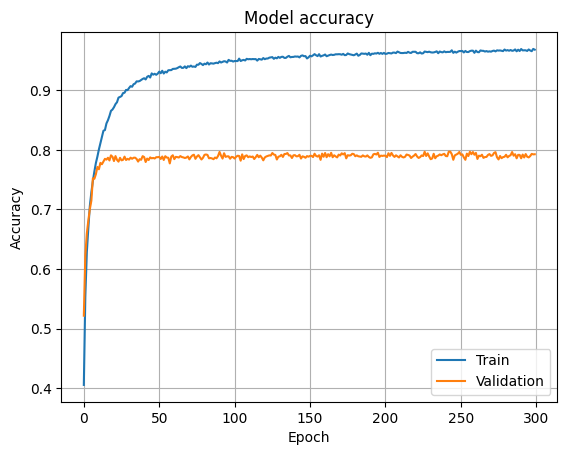

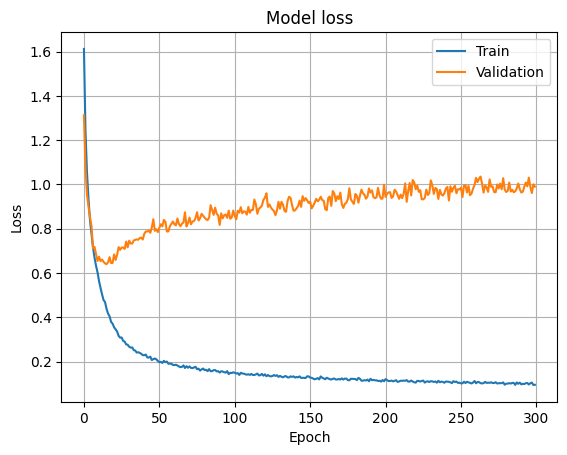

In [ ]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

테스트 결과 및 Confusion Matrix 그리기

In [ ]:
# 테스트 집합
res = cnn.predict(x_test)   # [0.1, 0.8, 0.1]

# Confusion Matrix
conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i].argmax()][y_test[i].argmax()]+=1
print(conf)

# 정확률 계산(2)
no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("정확률(%):",accuracy*100)

313/313 [==============================] - 1s 3ms/step
[[822.  12.  62.  19.  12.   7.   5.   9.  45.  20.]
 [ 11. 880.   5.   5.   3.   4.   3.   0.  17.  45.]
 [ 25.   5. 669.  45.  35.  28.  33.  15.   9.   6.]
 [ 15.   3.  53. 581.  40. 145.  30.  35.   6.   6.]
 [ 17.   1.  71.  74. 807.  48.  22.  54.   5.   1.]
 [  5.   1.  53. 166.  22. 711.   7.  52.   4.   7.]
 [ 14.  11.  60.  56.  41.  20. 888.   6.   8.   5.]
 [  9.   2.  13.  28.  31.  27.   6. 809.   3.  11.]
 [ 51.  21.   8.  11.   6.   6.   3.   5. 882.  22.]
 [ 31.  64.   6.  15.   3.   4.   3.  15.  21. 877.]]
정확률(%): 79.25999999999999


저장된 모델 불러오기 및 평가

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn2 = load_model(dir + "cnn_cifar10.h5")
cnn2.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_test = x_test.astype(np.float32)/255.0
y_test = tf.keras.utils.to_categorical(y_test,10)

res=cnn2.evaluate(x_test, y_test, verbose=0)
print("정확률(%):",res[1]*100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        